In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("papers")

In [2]:
data = pd.read_csv("../../results/VAR_ttests.csv", index_col=0)
data["data type"] = data["A"] + " X " + data["B"]
data_sub = data[["T", "p-corr", "var", "VAR length", "Segment length", "data type"]]
data_sub = data_sub[
    data_sub["var"].isin(
        [
            "mixing time",
            "entropy",
            "entropy_rate",
            "AIF 1st peak",
            # "var_GFP",
            # "coverage",
            # "occurrence",
            # "lifespan",
            # "transition_matrix",
        ]
    )
]

In [3]:
data_sub["data type"] = data_sub["VAR length"].astype(str) + data_sub["data type"]
data_sub

,T,p-corr,var,VAR length,Segment length,data type
0,5.070620,4.920594e-06,mixing time,3600.0,10.0,3600.0VAR-full X VAR-segments-mean
1,0.838537,7.383203e-01,mixing time,3600.0,10.0,3600.0VAR-full X real_data
2,-3.443831,1.917500e-03,mixing time,3600.0,10.0,3600.0VAR-segments-mean X real_data
0,7.432192,1.630811e-11,entropy,3600.0,10.0,3600.0VAR-full X VAR-segments-mean
1,-0.006656,1.000000e+00,entropy,3600.0,10.0,3600.0VAR-full X real_data
...,...,...,...,...,...,...
1,10.222732,1.343042e-19,entropy_rate,1200.0,10.0,1200.0VAR-full X real_data
2,1.852257,1.199881e-01,entropy_rate,1200.0,10.0,1200.0VAR-segments-mean X real_data
0,3.900967,7.173718e-04,AIF 1st peak,1200.0,10.0,1200.0VAR-full X VAR-segments-mean
1,-0.979043,6.026709e-01,AIF 1st peak,1200.0,10.0,1200.0VAR-full X real_data


## V1 - data type -- metric

In [4]:
data_T = data_sub.pivot(
    columns="Segment length", index=["data type", "var"], values="T"
)
data_p = data_sub.pivot(
    columns="Segment length", index=["data type", "var"], values="p-corr"
)
data_T = data_T.rename(
    index={
        "AIF 1st peak": "AIF",
        "entropy_rate": "E. rate",
        "1200.0VAR-full X VAR-segments-mean": "20min VAR X segments",
        "1200.0VAR-full X real_data": "20min VAR X EEG",
        "1200.0VAR-segments-mean X real_data": "20min segments X EEG",
        "3600.0VAR-full X VAR-segments-mean": "1hr VAR X segments",
        "3600.0VAR-full X real_data": "1hr VAR X EEG",
        "3600.0VAR-segments-mean X real_data": "1hr segments X EEG",
    }
)
data_p = data_p.rename(
    index={
        "AIF 1st peak": "AIF",
        "entropy_rate": "E. rate",
        "1200.0VAR-full X VAR-segments-mean": "20min VAR X segments",
        "1200.0VAR-full X real_data": "20min VAR X EEG",
        "1200.0VAR-segments-mean X real_data": "20min segments X EEG",
        "3600.0VAR-full X VAR-segments-mean": "1hr VAR X segments",
        "3600.0VAR-full X real_data": "1hr VAR X EEG",
        "3600.0VAR-segments-mean X real_data": "1hr segments X EEG",
    }
)
data_p = data_p.applymap(
    lambda x: "".join(["*" for t in [0.001, 0.01, 0.05] if x <= t])
)
data_T.max(), data_T.min()

(Segment length
 10.0     10.708344
 30.0     14.320146
 60.0      7.243621
 180.0    10.171354
 dtype: float64,
 Segment length
 10.0    -5.266505
 30.0    -3.840894
 60.0    -3.085412
 180.0   -2.515956
 dtype: float64)

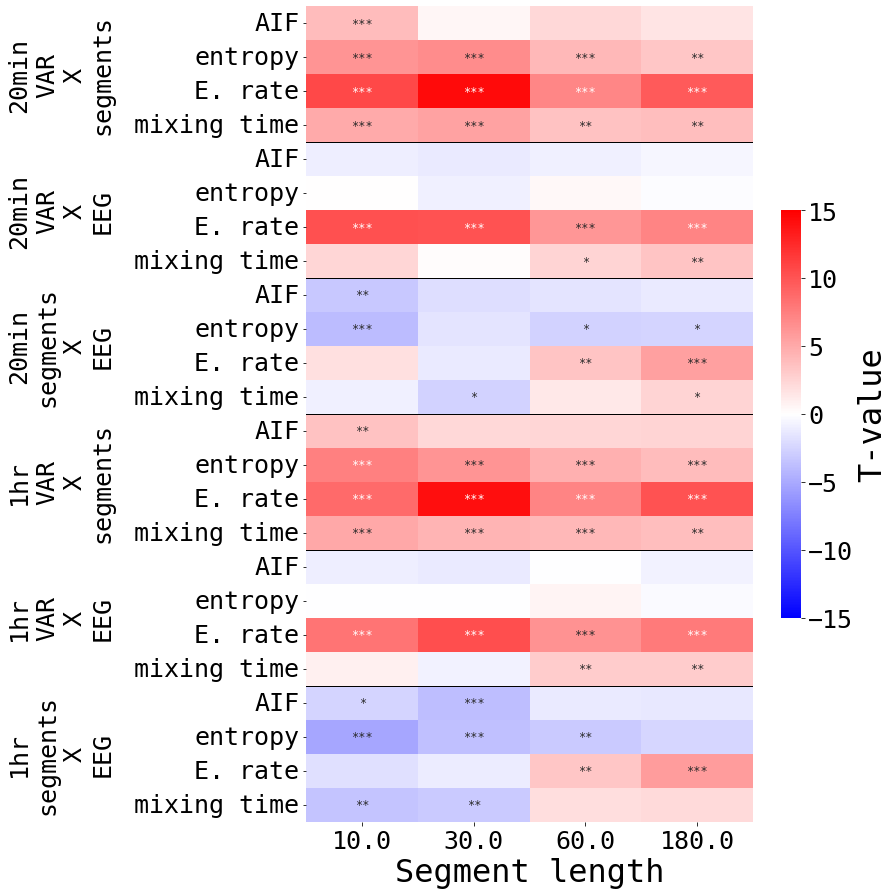

In [5]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111)
sns.heatmap(
    data_T,
    cbar_kws={"shrink": 0.5, "label": "T-value"},
    cmap="bwr",
    ax=ax,
    vmax=15,
    vmin=-15,
    annot=data_p,
    annot_kws={"size": 12},
    fmt="",
)
ax.set_ylabel("")
_ = ax.set_yticklabels(data_T.index.get_level_values(level=1).tolist(), rotation=0)
shift = int(len(data_T.index.get_level_values(0)) / len(data_T.index.get_level_values(0).unique()))
for pos, idx in enumerate(data_T.index.get_level_values(0).unique()):
    idx = idx.replace(" X ", "\nX\n")
    idx = idx.replace(" ", "\n")
    ax.text(-2.2, pos*shift + shift//2, idx, rotation=90, ha="center", va="center", size=25)
    if pos >= 1:
        ax.plot((0, 4), (pos*shift, pos*shift), "k", linewidth=1.0)

## V2 - metric -- data type

In [6]:
data_T = data_sub.pivot(
    columns="Segment length", index=["var", "data type"], values="T"
)
data_p = data_sub.pivot(
    columns="Segment length", index=["var", "data type"], values="p-corr"
)
data_T = data_T.rename(
    index={
        "AIF 1st peak": "AIF",
        "entropy_rate": "E. rate",
        "1200.0VAR-full X VAR-segments-mean": "20min VAR X segments",
        "1200.0VAR-full X real_data": "20min VAR X EEG",
        "1200.0VAR-segments-mean X real_data": "20min segments X EEG",
        "3600.0VAR-full X VAR-segments-mean": "1hr VAR X segments",
        "3600.0VAR-full X real_data": "1hr VAR X EEG",
        "3600.0VAR-segments-mean X real_data": "1hr segments X EEG",
    }
)
data_p = data_p.rename(
    index={
        "AIF 1st peak": "AIF",
        "entropy_rate": "E. rate",
        "1200.0VAR-full X VAR-segments-mean": "20min VAR X segments",
        "1200.0VAR-full X real_data": "20min VAR X EEG",
        "1200.0VAR-segments-mean X real_data": "20min segments X EEG",
        "3600.0VAR-full X VAR-segments-mean": "1hr VAR X segments",
        "3600.0VAR-full X real_data": "1hr VAR X EEG",
        "3600.0VAR-segments-mean X real_data": "1hr segments X EEG",
    }
)
data_p = data_p.applymap(
    lambda x: "".join(["*" for t in [0.001, 0.01, 0.05] if x <= t])
)
data_T.max(), data_T.min()

(Segment length
 10.0     10.708344
 30.0     14.320146
 60.0      7.243621
 180.0    10.171354
 dtype: float64,
 Segment length
 10.0    -5.266505
 30.0    -3.840894
 60.0    -3.085412
 180.0   -2.515956
 dtype: float64)

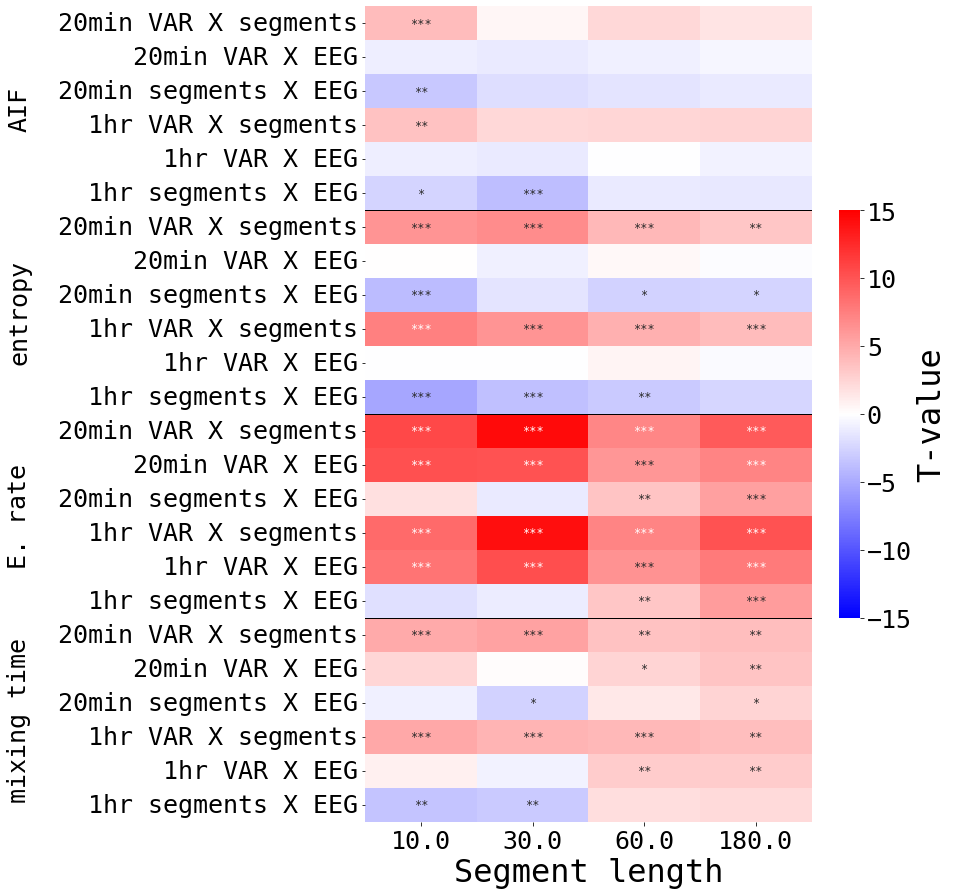

In [7]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111)
sns.heatmap(
    data_T,
    cbar_kws={"shrink": 0.5, "label": "T-value"},
    cmap="bwr",
    ax=ax,
    vmax=15,
    vmin=-15,
    annot=data_p,
    annot_kws={"size": 12},
    fmt="",
)
ax.set_ylabel("")
_ = ax.set_yticklabels(data_T.index.get_level_values(level=1).tolist(), rotation=0)
shift = int(len(data_T.index.get_level_values(0)) / len(data_T.index.get_level_values(0).unique()))
for pos, idx in enumerate(data_T.index.get_level_values(0).unique()):
    # idx = idx.replace(" X ", "\nX\n")
    # idx = idx.replace(" ", "\n")
    ax.text(-3.1, pos*shift + shift//2, idx, rotation=90, ha="center", va="center", size=25)
    if pos >= 1:
        ax.plot((0, 4), (pos*shift, pos*shift), "k", linewidth=1.0)

In [8]:
data = pd.read_csv("../../results/VAR_ttests.csv", index_col=0)
data["data type"] = data["A"] + " X " + data["B"]
data_sub = data[["T", "p-corr", "var", "VAR length", "Segment length", "data type"]]
data_sub = data_sub[
    data_sub["var"].isin(
        [
            # "mixing time",
            # "entropy",
            # "entropy_rate",
            # "AIF 1st peak",
            "var_GFP",
            "coverage",
            "occurrence",
            "lifespan",
            "transition_matrix",
        ]
    )
]

In [9]:
data_sub["data type"] = data_sub["VAR length"].astype(str) + data_sub["data type"]
data_sub

,T,p-corr,var,VAR length,Segment length,data type
0,2.959786,1.895609e-02,var_GFP,3600.0,10.0,3600.0VAR-full X VAR-segments-mean
1,2.650702,2.384002e-02,var_GFP,3600.0,10.0,3600.0VAR-full X real_data
2,1.304729,3.546941e-01,var_GFP,3600.0,10.0,3600.0VAR-segments-mean X real_data
0,3.565712,8.304782e-04,coverage,3600.0,10.0,3600.0VAR-full X VAR-segments-mean
1,-7.467616,6.605600e-12,coverage,3600.0,10.0,3600.0VAR-full X real_data
...,...,...,...,...,...,...
1,-1.531531,2.332050e-01,lifespan,1200.0,10.0,1200.0VAR-full X real_data
2,-5.702400,1.141696e-07,lifespan,1200.0,10.0,1200.0VAR-segments-mean X real_data
0,7.564977,3.692700e-12,transition_matrix,1200.0,10.0,1200.0VAR-full X VAR-segments-mean
1,-0.258525,1.000000e+00,transition_matrix,1200.0,10.0,1200.0VAR-full X real_data


## V1 - data type -- metric

In [10]:
data_T = data_sub.pivot(
    columns="Segment length", index=["data type", "var"], values="T"
)
data_p = data_sub.pivot(
    columns="Segment length", index=["data type", "var"], values="p-corr"
)
data_T = data_T.rename(
    index={
        "transition_matrix": "trans. mat.",
        "1200.0VAR-full X VAR-segments-mean": "20min VAR X segments",
        "1200.0VAR-full X real_data": "20min VAR X EEG",
        "1200.0VAR-segments-mean X real_data": "20min segments X EEG",
        "3600.0VAR-full X VAR-segments-mean": "1hr VAR X segments",
        "3600.0VAR-full X real_data": "1hr VAR X EEG",
        "3600.0VAR-segments-mean X real_data": "1hr segments X EEG",
    }
)
data_p = data_p.rename(
    index={
        "transition_matrix": "trans. mat.",
        "1200.0VAR-full X VAR-segments-mean": "20min VAR X segments",
        "1200.0VAR-full X real_data": "20min VAR X EEG",
        "1200.0VAR-segments-mean X real_data": "20min segments X EEG",
        "3600.0VAR-full X VAR-segments-mean": "1hr VAR X segments",
        "3600.0VAR-full X real_data": "1hr VAR X EEG",
        "3600.0VAR-segments-mean X real_data": "1hr segments X EEG",
    }
)
data_p = data_p.applymap(
    lambda x: "".join(["*" for t in [0.001, 0.01, 0.05] if x <= t])
)
data_T.max(), data_T.min()

(Segment length
 10.0     8.473669
 30.0     8.254814
 60.0     7.261528
 180.0    6.207874
 dtype: float64,
 Segment length
 10.0    -9.829945
 30.0    -7.194823
 60.0    -7.574202
 180.0   -6.627679
 dtype: float64)

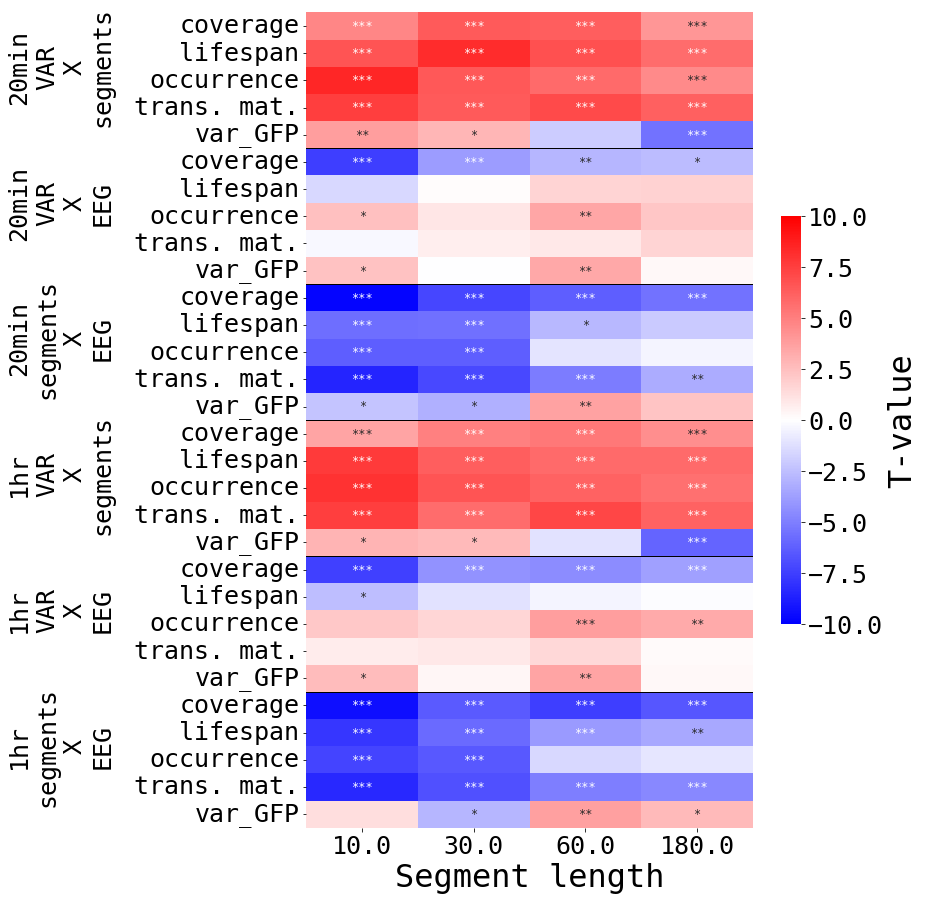

In [11]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111)
sns.heatmap(
    data_T,
    cbar_kws={"shrink": 0.5, "label": "T-value"},
    cmap="bwr",
    ax=ax,
    vmax=10,
    vmin=-10,
    annot=data_p,
    annot_kws={"size": 12},
    fmt="",
)
ax.set_ylabel("")
_ = ax.set_yticklabels(data_T.index.get_level_values(level=1).tolist(), rotation=0)
shift = int(len(data_T.index.get_level_values(0)) / len(data_T.index.get_level_values(0).unique()))
for pos, idx in enumerate(data_T.index.get_level_values(0).unique()):
    idx = idx.replace(" X ", "\nX\n")
    idx = idx.replace(" ", "\n")
    ax.text(-2.2, pos*shift + shift//2, idx, rotation=90, ha="center", va="center", size=25)
    if pos >= 1:
        ax.plot((0, 4), (pos*shift, pos*shift), "k", linewidth=1.0)

## V2 - metric -- data type

In [12]:
data_T = data_sub.pivot(
    columns="Segment length", index=["var", "data type"], values="T"
)
data_p = data_sub.pivot(
    columns="Segment length", index=["var", "data type"], values="p-corr"
)
data_T = data_T.rename(
    index={
        "transition_matrix": "trans. mat.",
        "1200.0VAR-full X VAR-segments-mean": "20min VAR X segments",
        "1200.0VAR-full X real_data": "20min VAR X EEG",
        "1200.0VAR-segments-mean X real_data": "20min segments X EEG",
        "3600.0VAR-full X VAR-segments-mean": "1hr VAR X segments",
        "3600.0VAR-full X real_data": "1hr VAR X EEG",
        "3600.0VAR-segments-mean X real_data": "1hr segments X EEG",
    }
)
data_p = data_p.rename(
    index={
        "transition_matrix": "trans. mat.",
        "1200.0VAR-full X VAR-segments-mean": "20min VAR X segments",
        "1200.0VAR-full X real_data": "20min VAR X EEG",
        "1200.0VAR-segments-mean X real_data": "20min segments X EEG",
        "3600.0VAR-full X VAR-segments-mean": "1hr VAR X segments",
        "3600.0VAR-full X real_data": "1hr VAR X EEG",
        "3600.0VAR-segments-mean X real_data": "1hr segments X EEG",
    }
)
data_p = data_p.applymap(
    lambda x: "".join(["*" for t in [0.001, 0.01, 0.05] if x <= t])
)
data_T.max(), data_T.min()

(Segment length
 10.0     8.473669
 30.0     8.254814
 60.0     7.261528
 180.0    6.207874
 dtype: float64,
 Segment length
 10.0    -9.829945
 30.0    -7.194823
 60.0    -7.574202
 180.0   -6.627679
 dtype: float64)

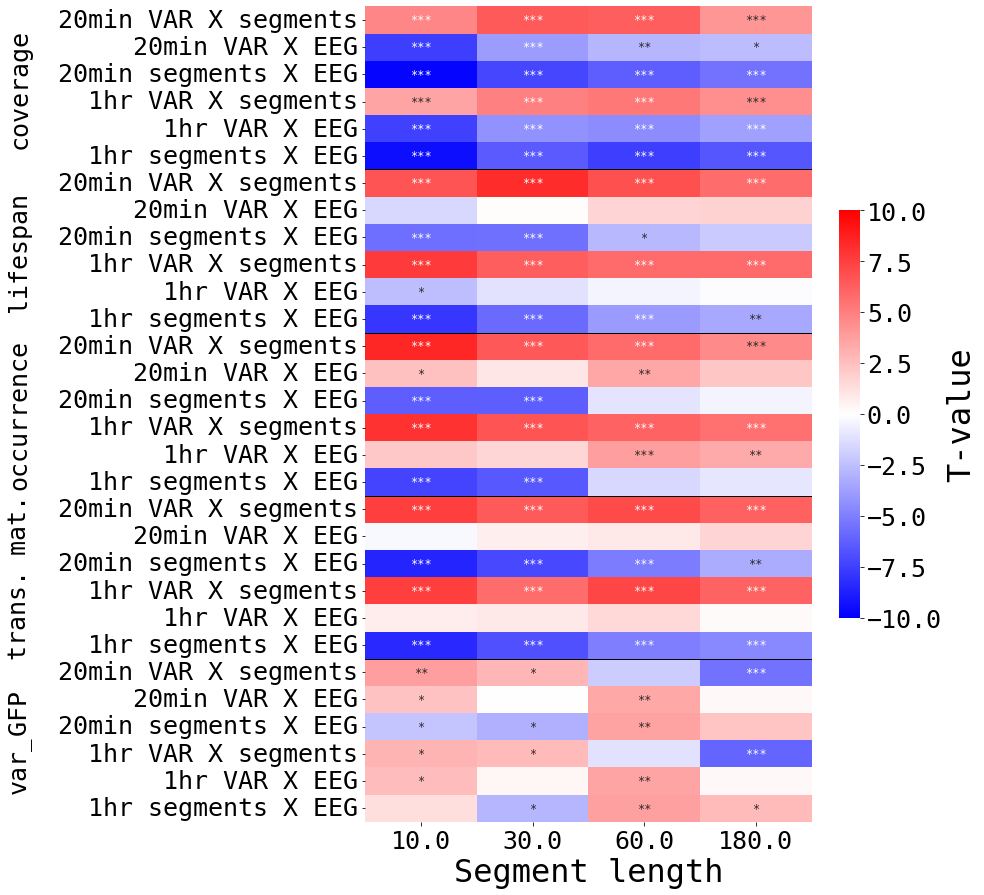

In [13]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111)
sns.heatmap(
    data_T,
    cbar_kws={"shrink": 0.5, "label": "T-value"},
    cmap="bwr",
    ax=ax,
    vmax=10,
    vmin=-10,
    annot=data_p,
    annot_kws={"size": 12},
    fmt="",
)
ax.set_ylabel("")
_ = ax.set_yticklabels(data_T.index.get_level_values(level=1).tolist(), rotation=0)
shift = int(len(data_T.index.get_level_values(0)) / len(data_T.index.get_level_values(0).unique()))
for pos, idx in enumerate(data_T.index.get_level_values(0).unique()):
    # idx = idx.replace(" X ", "\nX\n")
    # idx = idx.replace(" ", "\n")
    ax.text(-3.1, pos*shift + shift//2, idx, rotation=90, ha="center", va="center", size=25)
    if pos >= 1:
        ax.plot((0, 4), (pos*shift, pos*shift), "k", linewidth=1.0)